# CS170A -- HW#0 -- Solution form -- Python

Your name:  _zhengkai zhang_____________________

Your UID:  __604582162_______

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are
deducted.

## Problem 1:  Images (30 points)

<b>(a) color-to-grayscale transformation:</b>
<br/>
include both your function <tt>grayscale(A)</tt>
and its result where <tt>A</tt> the RGB Mandrill image.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
X = pd.read_csv('mandrill_X.csv', header=None).as_matrix()
X.shape
t=0.25

In [4]:
X[10:13][:,30:35]  #  some map index values in the X array

array([[153,  75,  95, 190, 176],
       [146, 190, 151, 118, 151],
       [132, 142, 208, 196, 191]], dtype=int64)

In [5]:
map = pd.read_csv('mandrill_map.csv', header=None).as_matrix()
map.shape

(220, 3)

In [6]:
map[153]  #  RGB value for the index value 153

array([ 0.3203125 ,  0.578125  ,  0.80078125])

In [7]:
def grayscale(A):
    def map_R(i): return (map[i-1,0]+map[i-1,1]+map[i-1,2])/3

    def map_G(i): return (map[i-1,0]+map[i-1,1]+map[i-1,2])/3

    def map_B(i): return (map[i-1,0]+map[i-1,1]+map[i-1,2])/3
    ind2r = np.vectorize(map_R)   # apply the map_R function to every member of an array
    ind2g = np.vectorize(map_G)   # apply the map_G function to every member of an array
    ind2b = np.vectorize(map_B)   # apply the map_B function to every member of an array

    def ind2rgb(A):
        return np.stack( [ind2r(A), ind2g(A), ind2b(A)], axis=2)
  
    Mandrill = ind2rgb(X)
    Mandrill.shape
    Mandrill[10:13][:,30:35]   #  a little window into the image, which is now a 3D array
    plt.rcParams['figure.figsize'] = (9.6,10.0)

    plt.imshow(Mandrill)
    plt.show()

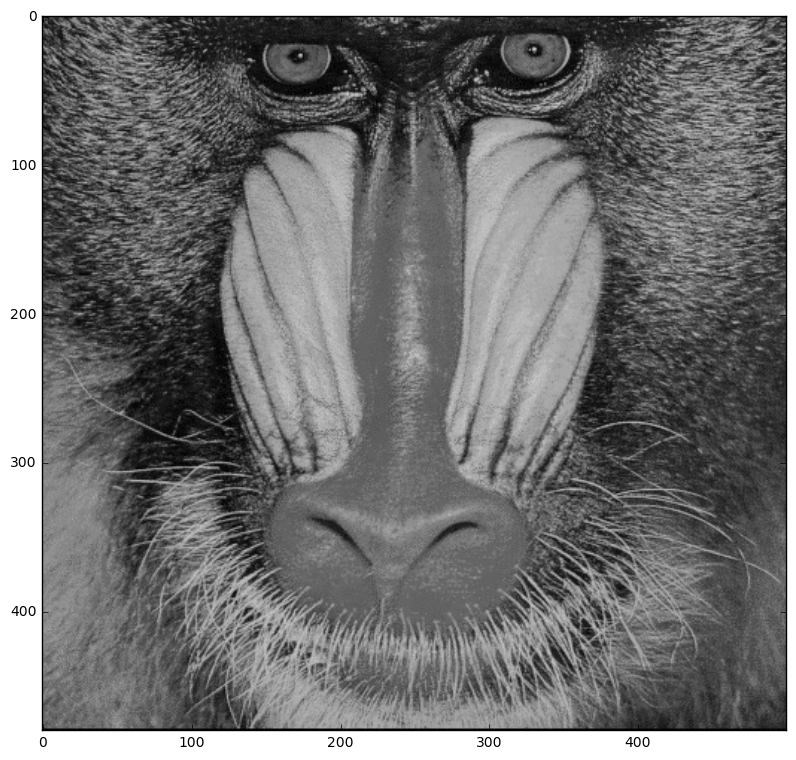

In [8]:
grayscale(X)

<b>(b) image saturation and oversaturation:</b>
<br/>
include both your function <tt>saturate(A,t)</tt>
and its result where <tt>A</tt> the RGB Mandrill image, when t=0.25.


In [9]:
def saturate(A,t):
    
    def map_R(i): return (map[i-1,0]+map[i-1,1]+map[i-1,2])/3

    def map_G(i): return (map[i-1,0]+map[i-1,1]+map[i-1,2])/3

    def map_B(i): return (map[i-1,0]+map[i-1,1]+map[i-1,2])/3
    ind2r = np.vectorize(map_R)   # apply the map_R function to every member of an array
    ind2g = np.vectorize(map_G)   # apply the map_G function to every member of an array
    ind2b = np.vectorize(map_B)   # apply the map_B function to every member of an array

    def ind2rgb(A):
        return np.stack( [ind2r(A), ind2g(A), ind2b(A)], axis=2)
    
    def map_R1(i): return map[i-1,0]

    def map_G1(i): return map[i-1,1]

    def map_B1(i): return map[i-1,2]
    
    ind2r1 = np.vectorize(map_R1)   # apply the map_R function to every member of an array
    ind2g1 = np.vectorize(map_G1)   # apply the map_G function to every member of an array
    ind2b1 = np.vectorize(map_B1)   # apply the map_B function to every member of an array
    def ind2rgb1(A):
        return np.stack( [ind2r1(A), ind2g1(A), ind2b1(A)], axis=2)
    MandrillA = ind2rgb1(A)  #this is the original color
    MandrillB = ind2rgb(A)  #this is the gray color
    Mandrill = MandrillA*(1-t)+MandrillB*t
    Mandrill.shape
    Mandrill[10:13][:,30:35]   #  a little window into the image, which is now a 3D array
    plt.rcParams['figure.figsize'] = (9.6,10.0)

    plt.imshow(Mandrill)
    plt.show()

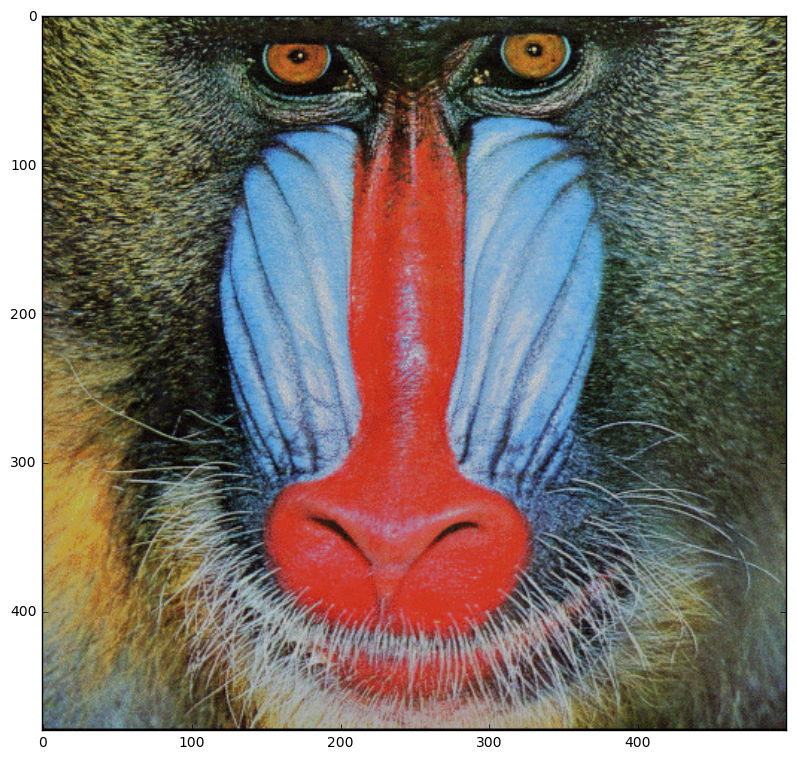

In [10]:
saturate(X,t)

<b>(c) image brightening:</b>
<br/>
include both your function <tt>brighten(A,t)</tt>
and its result where <tt>A</tt> the RGB Mandrill image, when t=0.25.

In [11]:
def brighten(A,t):
    def map_R1(i): return map[i-1,0]

    def map_G1(i): return map[i-1,1]

    def map_B1(i): return map[i-1,2]
    
    ind2r1 = np.vectorize(map_R1)   # apply the map_R function to every member of an array
    ind2g1 = np.vectorize(map_G1)   # apply the map_G function to every member of an array
    ind2b1 = np.vectorize(map_B1)   # apply the map_B function to every member of an array
    def ind2rgb1(A):
        return np.stack( [ind2r1(A), ind2g1(A), ind2b1(A)], axis=2)
    Mandrill= ind2rgb1(A)*t  #this is the original color
    Mandrill.shape
    Mandrill[10:13][:,30:35]   #  a little window into the image, which is now a 3D array
    plt.rcParams['figure.figsize'] = (9.6,10.0)

    plt.imshow(Mandrill)
    plt.show()

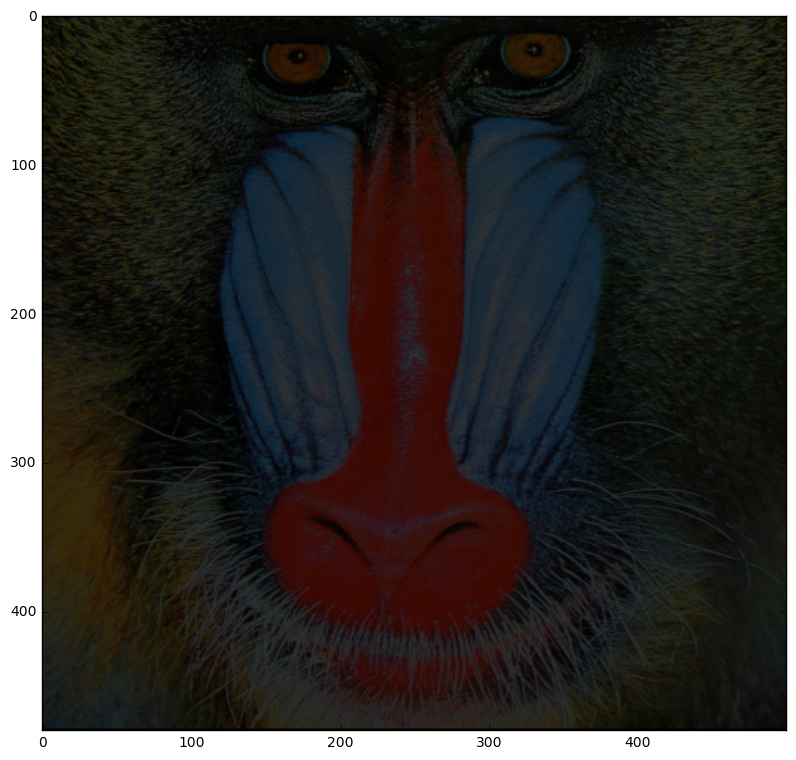

In [12]:
brighten(X,t)

## Problem 2: Color Models  (30 points)

<b>(a) RGB to YCbCr(R,G,B):</b>
<br/>
Prove that the result of <tt>RGB to YCbCr(R,G,B)</tt>
are all in the range 0 t 255, provided R, G, and B are.

In [13]:
#function [Y_uint8 Cb_uint8 Cr_uint8] = YCbCr(Rval, Gval, Bval)
#    MAXJSAMPLE = 255;
#    CENTERJSAMPLE = 128;
#
#    R = double(Rval);
#    G = double(Gval);
#    B = double(Bval);
#    if (max(max([R G B])) <= 1.0)
#       R = R * MAXJSAMPLE;
#       G = G * MAXJSAMPLE;
#       B = B * MAXJSAMPLE;
#    end;
#
#    Y  =  0.29900 * R + 0.58700 * G + 0.11400 * B;
#    Cb = -0.16874 * R - 0.33126 * G + 0.50000 * B  + CENTERJSAMPLE;
#    Cr =  0.50000 * R - 0.41869 * G - 0.08131 * B  + CENTERJSAMPLE;
#
#    Y_uint8  = uint8( Y );
#    Cb_uint8 = uint8( Cb );
#    Cr_uint8 = uint8( Cr );

#Question 1:Prove that entries in the result of the RGB to YCbCr(R,G,B) are all in the range 0 to 255 
#(provided R, G, B are):
#As code above R G B have the value at most 255 and at least 0
#Y = 0.29900 * R + 0.58700 * G + 0.11400 * B; all coefficent add together equal to 1 ,and R,G,B at most 255
#so Y will be at most 255 and since R,G,B at least 0,so the result here won't less than 0
#Cb = -0.16874 * R - 0.33126 * G + 0.50000 * B  + CENTERJSAMPLE; all coeeficent add together equal to 0 at most when 
#R,G =0 B= 255*0.5 +128 won't greater than 255 and at least B=0,R,G=255 at won't less than zero since negative coeeficent
#is -0.5 at least +128 won't less than zero
#Cr =  0.50000 * R - 0.41869 * G - 0.08131 * B  + CENTERJSAMPLE; this is the same as Cb at most when R = 255,G,B =0 +128 
#or at least R=0,G,B=255 +128 at least 0 still between 0 to 255,so the result will always between 0 to 255

<b>(b) RGB to CMY(R,G,B):</b>
<br/>
Develop a similar kind of function <tt>RGB_to_CMY(R,G,B)</tt>
for converting RGB to CMY values.

In [14]:
def RGBtoCMY():
    def map_R1(i): return 1-map[i-1,0]

    def map_G1(i): return 1-map[i-1,1]

    def map_B1(i): return 1-map[i-1,2]
    
    ind2r1 = np.vectorize(map_R1)   # apply the map_R function to every member of an array
    ind2g1 = np.vectorize(map_G1)   # apply the map_G function to every member of an array
    ind2b1 = np.vectorize(map_B1)   # apply the map_B function to every member of an array
    def ind2rgb1(X):
        return np.stack( [ind2r1(X), ind2g1(X), ind2b1(X)], axis=2)
    Mandrill= ind2rgb1(X)  #this is the CMY color
    Mandrill.shape
    Mandrill[10:13][:,30:35]   #  a little window into the image, which is now a 3D array
    plt.rcParams['figure.figsize'] = (9.6,10.0)

    plt.imshow(Mandrill)
    plt.show()

<b>(c) CMY Mandrill:</b>
<br/>
Show your result of <tt>RGB_to_CMY()</tt> for the Mandrill image by rendering it in RGB.
(Please display the image in RGB -- with Cyan as Red, Magenta as Green, Yellow as Blue.)

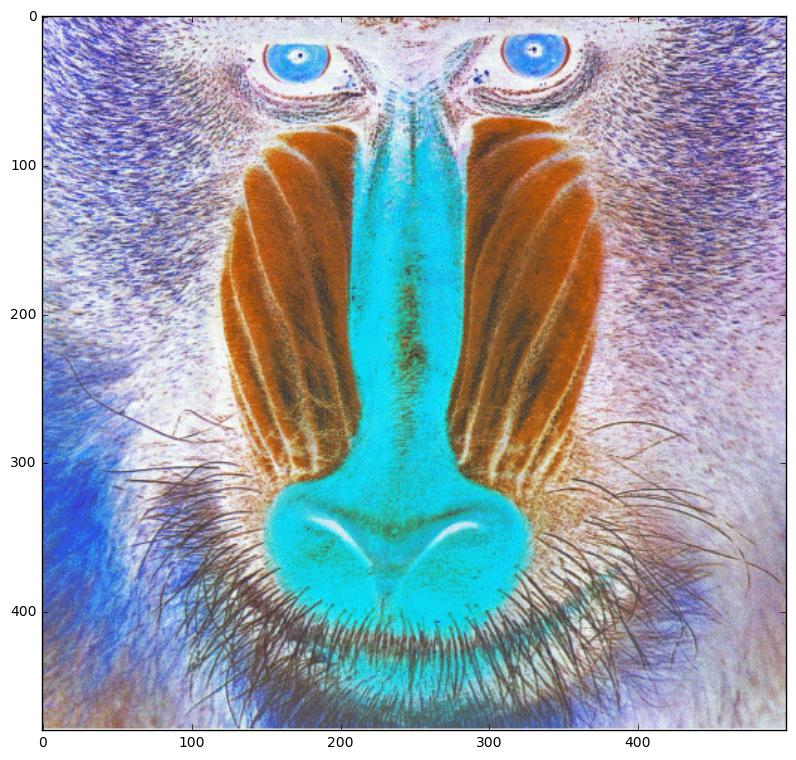

In [15]:
RGBtoCMY()

## Problem 3: Rotations  (20 points)

The file <tt>rotations_and_reflections.m</tt> produces some 2x2 matrices,
and shows how to define symbolic variables like $\theta$.
Using symbolic values, find a 3x3 matrix for $R_{123}(\psi,\theta,\phi)$.
(Hint: blkdiag might help.)

In [16]:
from sympy import *
psi,theta,phi= symbols('psi theta phi')  #  declare phi and theta to be symbolic variables
Rotation = lambda t: np.matrix([[cos(t), -sin(t)], [sin(t), cos(t)]])
Rotation1 = lambda t: np.matrix([[1,0,0],[0,cos(t), -sin(t)], [0,sin(t), cos(t)]])
Rotation2 = lambda t: np.matrix([[cos(t), -sin(t),0], [sin(t), cos(t),0],[0,0,1]])
Rotation2(psi)*Rotation1(theta)*Rotation2(phi)

matrix([[-sin(phi)*sin(psi)*cos(theta) + cos(phi)*cos(psi),
         -sin(phi)*cos(psi) - sin(psi)*cos(phi)*cos(theta),
         sin(psi)*sin(theta)],
        [sin(phi)*cos(psi)*cos(theta) + sin(psi)*cos(phi),
         -sin(phi)*sin(psi) + cos(phi)*cos(psi)*cos(theta),
         -sin(theta)*cos(psi)],
        [sin(phi)*sin(theta), sin(theta)*cos(phi), cos(theta)]], dtype=object)

## Problem 4: Slices  (20 points)

<b>(a) Global Average Temperature Anomaly:</b>
<br/>
plot the average (non-missing-value) temperature anomaly over the entire grid,
for every year from 1916 to 2015.

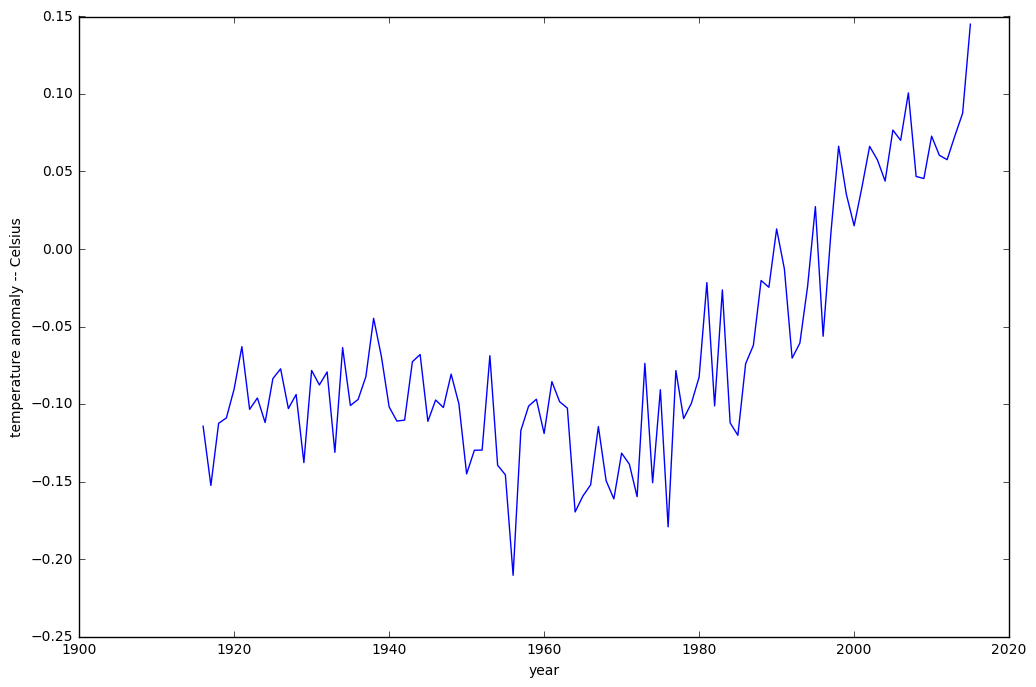

In [18]:
import pandas as pd
GHCN = pd.read_csv('ghcn.csv', header=None).fillna(0).as_matrix()

#   The data was artificially shifted to [0, 4500]
#     its range should be [-2500, +2000]/100 = [-25,+20], in degrees Centigrade.
#     Since our focus here is on warming, we ignore temperatures below -5.
#   We omit the year and month in columns 1:2 before scaling:

GHCN_in_centigrade  = (GHCN[:,2:74] - 2500.0) / 100.0                        # omit the first two columns
GHCN_in_centigrade.shape
temperature_anomaly = np.reshape( GHCN_in_centigrade, (36, 12, 137, 72), order="F" )
# convert to a 4D matrix, so we can use slices; use Fortran conventions, like Matlab

temperature_anomaly.shape
number_of_all_GHCN_values = np.prod( temperature_anomaly.shape )
number_of_all_GHCN_values
missing_values     = (temperature_anomaly == -25)
non_missing_values = (temperature_anomaly != -25)

number_of_missing_values = missing_values.sum()
number_of_missing_values
maximum_anomaly_value = temperature_anomaly.max()
maximum_anomaly_value
minimum_anomaly_value = temperature_anomaly[non_missing_values].min()
minimum_anomaly_value
year_month_anomaly = lambda Y,M: np.reshape( temperature_anomaly[:, M-1][:, :, Y-1880], (36,72), order="F")
year_month_missing = lambda Y,M: np.reshape(      missing_values[:, M-1][:, :, Y-1880], (36,72), order="F")
temperature_anomaly =temperature_anomaly*non_missing_values
US_latitude  = np.arange(0,36)
US_longitude = np.arange(0,72)
my_years = np.arange(1916,2016)
my_year_indices = np.arange(1916-1880,2016-1880)
temperature_anomaly[US_latitude][:,6,136,US_longitude] # anomaly in the for July 2016
my_slice = temperature_anomaly[ US_latitude ][ :, :, my_year_indices][ :, :, :, US_longitude ]
my_slice.shape
total_number_of_grid_squares = len(US_latitude) * len(US_longitude) * 12
N = total_number_of_grid_squares
average_US_anomaly_by_year = np.reshape( my_slice.sum(axis=3).sum(axis=1).sum(axis=0), (len(my_years), 1) ) / N
plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot( my_years, average_US_anomaly_by_year )
plt.xlabel('year')
plt.ylabel('temperature anomaly -- Celsius')
plt.show()


<b>(b) Global Warming:</b>
<br/>
Based on your plot, give your opinion on this question: is `global warming' real?

In [ ]:
#As the picture show above I don't really think global warming is real,since over 100 years the temperature only change about
#0.2 and it seems more like a periodic change.
